<a href="https://colab.research.google.com/github/alextawang/fcc-magic-example-from-colab/blob/main/fcc_MAGIC_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling  import RandomOverSampler


### Dataset
Data are MC generated to simulate registration of high energy gamma particles in an atmospheric Cherenkov telescope

Dataset Characteristics
Multivariate

Subject Area
Physics and Chemistry

Associated Tasks
Classification

Feature Type
Real

# Instances
19020

# Features
10

In [36]:
cols = ["fLength","fWidth","fSize","fConc","Concl","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df = pd.read_csv("magic04.data",names=cols)
df.head(-20)

,fLength,fWidth,fSize,fConc,Concl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
18995,67.7139,28.5831,3.2384,0.2050,0.1106,-133.6450,63.1391,-16.6379,47.9790,251.9930,h
18996,29.8353,11.3519,2.4449,0.4890,0.2948,9.9236,-9.0429,16.2790,17.1944,230.5486,h
18997,18.0124,10.6746,2.5694,0.5768,0.2951,-23.3968,-9.2150,4.7010,52.4630,172.5960,h
18998,207.2530,75.8327,4.1476,0.0739,0.0371,-242.4960,-180.0290,-57.8600,74.5740,259.3160,h


In [3]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [48]:
df["class"]=(df["class"]=="g").astype(int)
df.head()

,fLength,fWidth,fSize,fConc,Concl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,0
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,0
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,0
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,0
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,0


/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


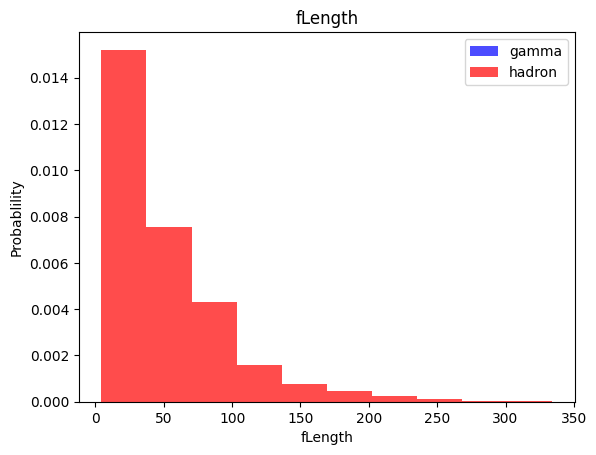

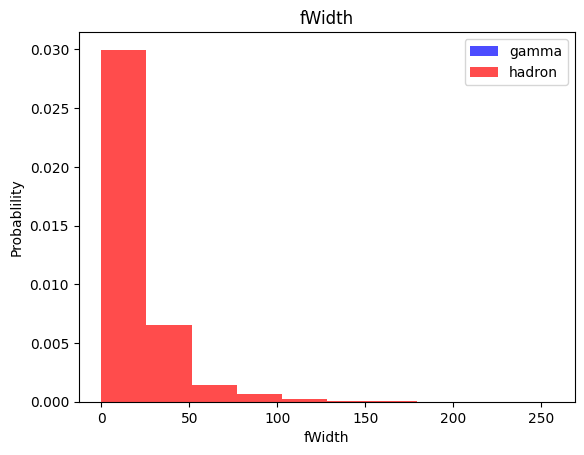

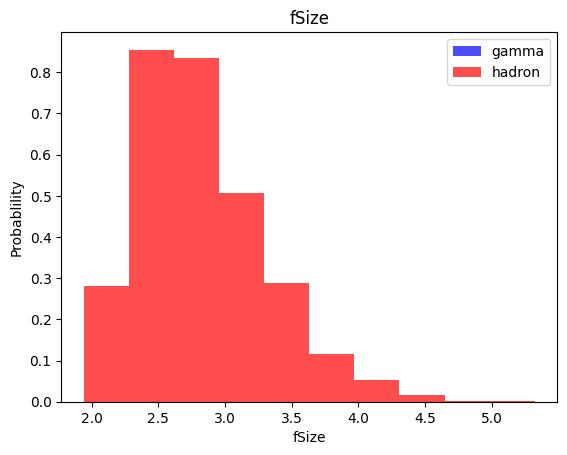

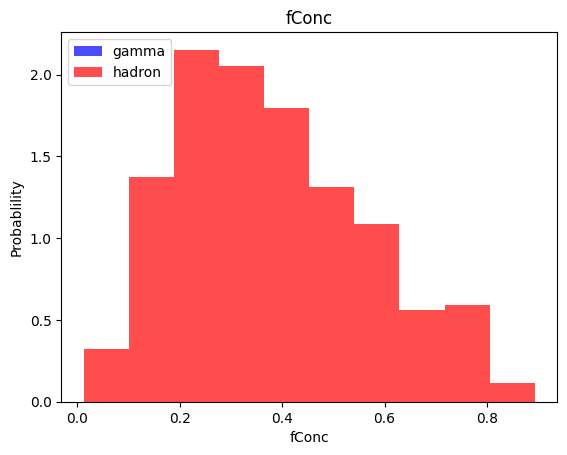

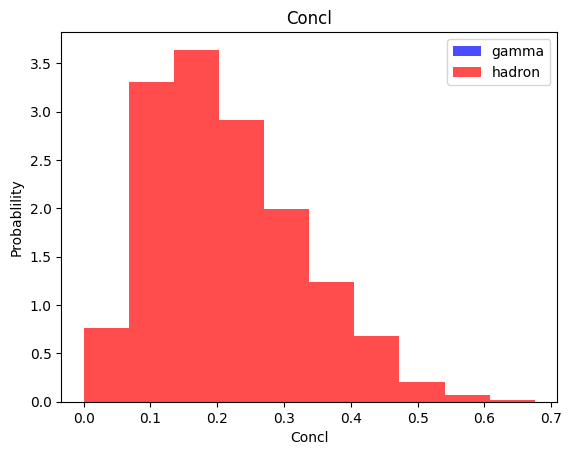

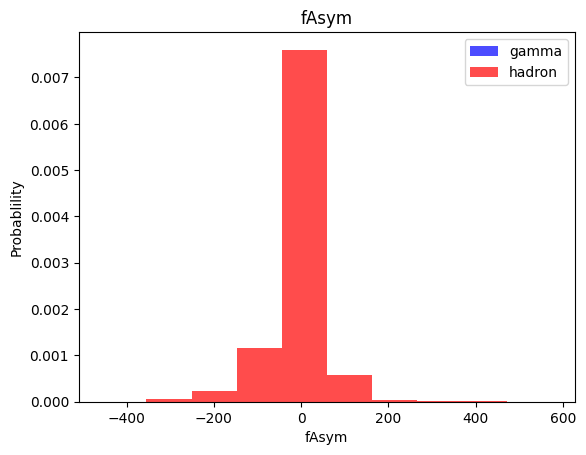

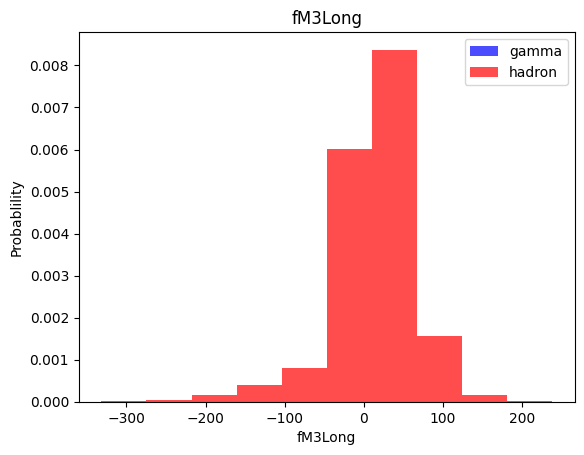

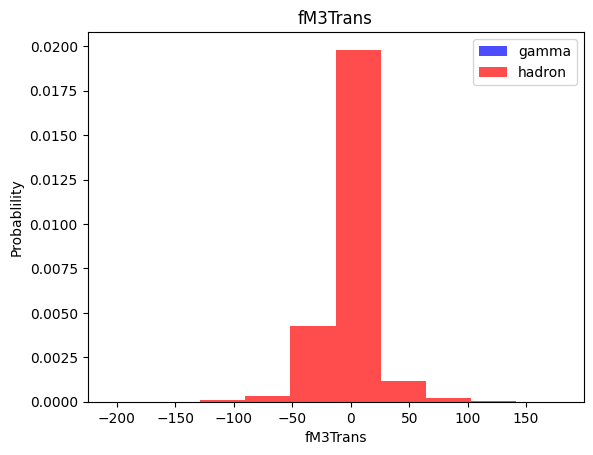

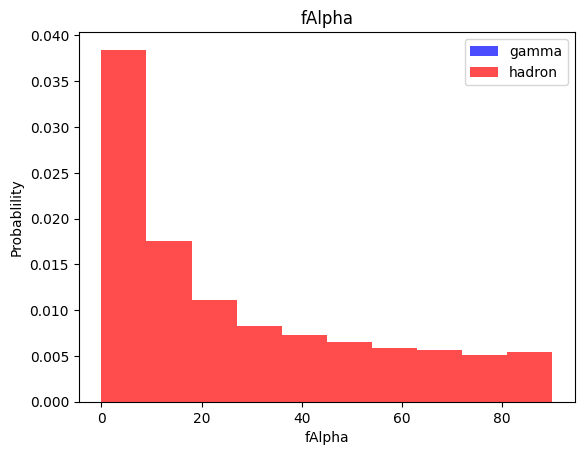

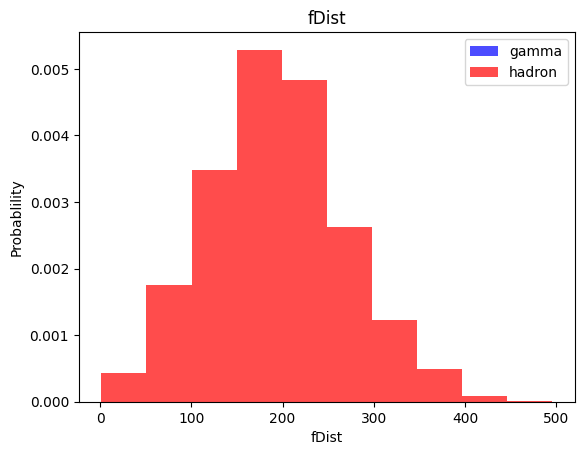

In [49]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label],color='blue',label='gamma',alpha=0.7,density=True)
  plt.hist(df[df["class"]==0][label],color='red',label='hadron',alpha=0.7,density=True)
  plt.title(label)
  plt.ylabel("Probablility")
  plt.xlabel(label)
  plt.legend()
  plt.show()



#Train validattion, test datasets


In [39]:
train, valid, test = np.split(df.sample(frac=1),[int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [50]:
def scale_dataset(dataframe,ovrsample=False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  x = scaler.fit_transform(x)
  if ovrsample:
    ros = RandomOverSampler()
    x,y = ros.fit_resample(x,y)
  data = np.hstack((x,np.reshape(y,(-1,1))))

  return data, x, y

In [51]:
train,X_train,y_train = scale_dataset(train,ovrsample=True)
valid,X_valid,y_valid = scale_dataset(valid,ovrsample=False)
test,X_test,y_test = scale_dataset(test,ovrsample=False)





AttributeError: 'numpy.ndarray' object has no attribute 'columns'

KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.78      0.68      0.72      1353
           1       0.83      0.90      0.86      2451

    accuracy                           0.82      3804
   macro avg       0.81      0.79      0.79      3804
weighted avg       0.82      0.82      0.81      3804

